In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
file_path = 'E:\AIML Tasks\heart.data.csv'
df = pd.read_csv(file_path)

if df.columns[0] == 'Unnamed: 0':
    df=df.drop(columns=df.columns[0])

df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Om\AppData\Local\Temp\ipykernel_18392\2737626756.py:1: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'E:\AIML Tasks\heart.data.csv'


,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


In [13]:
X=df[['biking', 'smoking']]
y=df['heart.disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("---Model Evaluation---")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

print("\n---Coefficients---")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Biking Coefficient: {model.coef_[0]:.4f}")
print(f"Smoking Coefficient: {model.coef_[1]:.4f}")

---Model Evaluation---
MAE: 0.5211
MSE: 0.4522
R2 Score: 0.9751

---Coefficients---
Intercept: 15.0172
Biking Coefficient: -0.2008
Smoking Coefficient: 0.1783


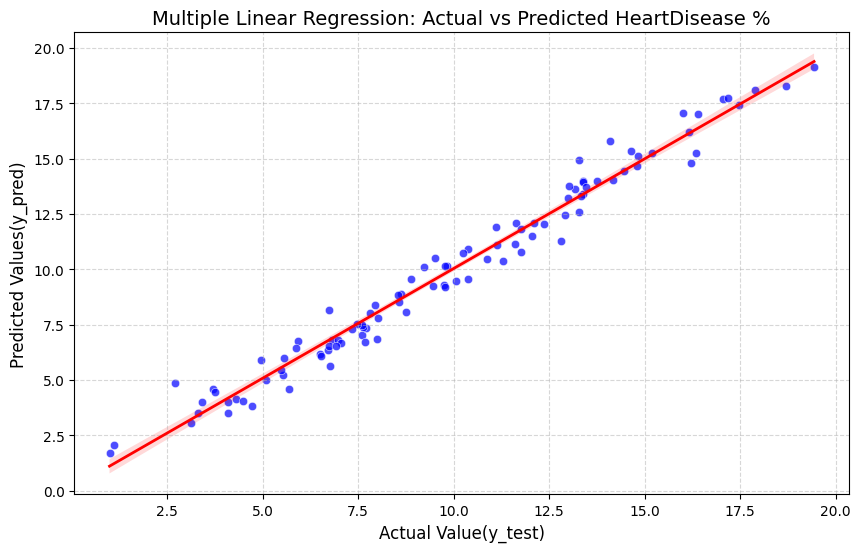

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Multiple Linear Regression: Actual vs Predicted HeartDisease %', fontsize=14)
plt.xlabel('Actual Value(y_test)', fontsize=12)
plt.ylabel('Predicted Values(y_pred)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
plt.savefig('2D_view.png')

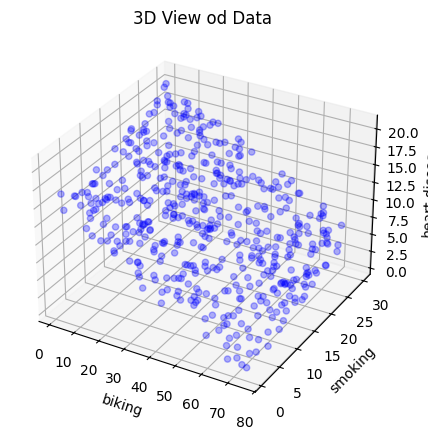

In [19]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['biking'], df['smoking'], df['heart.disease'], c='blue', marker='o', alpha=0.3)
ax.set_xlabel('biking')
ax.set_ylabel('smoking')
ax.set_zlabel('heart.disease')
ax.set_title('3D View od Data')
plt.savefig('3D_view.png')